In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn.functional as F

# Set device
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_built():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

# linear regression model

In [2]:
start = -5
stop = 10
step = 0.1
N = int((stop-start)/step)

weigth = 1.8
bias = 27

X = torch.arange(start,stop,step,device=device).unsqueeze(dim=1)

Y = weigth * X + bias

In [3]:
split = int(N*0.8)

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [4]:
def plot_sets(X_train,Y_train,X_test,Y_test):
    X_train = X_train.to("cpu")
    X_test = X_test.to("cpu")
    Y_train = X_train.to("cpu")
    Y_test = X_test.to("cpu")
    plt.scatter(X_train, Y_train, c="b",label="Training set")

    plt.scatter(X_test, Y_test, c="y", label = "Test set")
    plt.legend()

    plt.show()

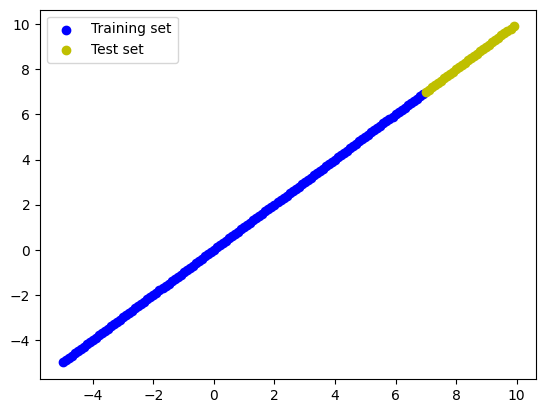

In [5]:
plot_sets(X_train,Y_train,X_test,Y_test)

In [6]:
class LinearRegressionModelNew(nn.Module):
    def __init__(self,input_features, output_features):
        super().__init__()
        self.linear_layer = nn.Linear(input_features,output_features,device=device)
    
    def forward(self,X):
        return self.linear_layer(X)

In [7]:
learning_rate = 0.01
n_epochs = 1000
in_features = 1 # Antal weigts
out_features = 1 # Samme som antal weigts, da vi vil have et output pr. input
model1 = LinearRegressionModelNew(in_features,out_features)
optimizer = optim.SGD(model1.parameters(),lr=learning_rate)
loss_fn = nn.MSELoss()


# Tracking the model
epoch_count = []
loss_values = []
test_loss_values = []

# Training the model
for epoch in range(n_epochs):
    model1.train()
    #Calculate predictions
    Y_predicted = model1(X_train)
    #Calculate loss
    loss = loss_fn(Y_predicted,Y_train)
    #backprobagate
    loss.backward()
    #take step
    optimizer.step()
    #reset gradients
    optimizer.zero_grad()

    # Testing the model
    with torch.inference_mode():
        model1.eval()
        Y_pred1 = model1(X_test)
        test_loss = loss_fn(Y_pred1,Y_test)

    # print the loss
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}, loss is {loss.item()} | Test loss is {test_loss.item()}")

    # Store the loss value for plotting
    epoch_count.append(epoch+1)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

Epoch 100, loss is 15.466580390930176 | Test loss is 1.8167692422866821
Epoch 200, loss is 0.3698956370353699 | Test loss is 0.04344923794269562
Epoch 300, loss is 0.008847290650010109 | Test loss is 0.0010392987169325352
Epoch 400, loss is 0.00021147455845493823 | Test loss is 2.4835257136146538e-05
Epoch 500, loss is 5.0718567763397004e-06 | Test loss is 5.937307605563547e-07
Epoch 600, loss is 1.2223573264691368e-07 | Test loss is 1.4079463817040505e-08
Epoch 700, loss is 2.486134187407174e-09 | Test loss is 2.672701782113762e-10
Epoch 800, loss is 2.3095103607317924e-09 | Test loss is 2.6775526240641057e-10
Epoch 900, loss is 2.3095103607317924e-09 | Test loss is 2.6775526240641057e-10
Epoch 1000, loss is 2.3095103607317924e-09 | Test loss is 2.6775526240641057e-10


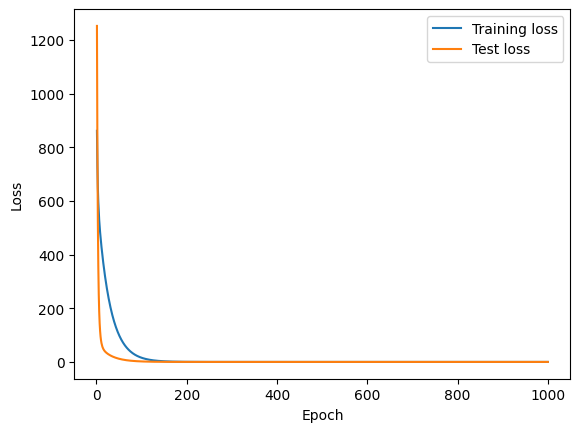

In [8]:
plt.plot(epoch_count,loss_values, label="Training loss")
plt.plot(epoch_count,test_loss_values, label="Test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

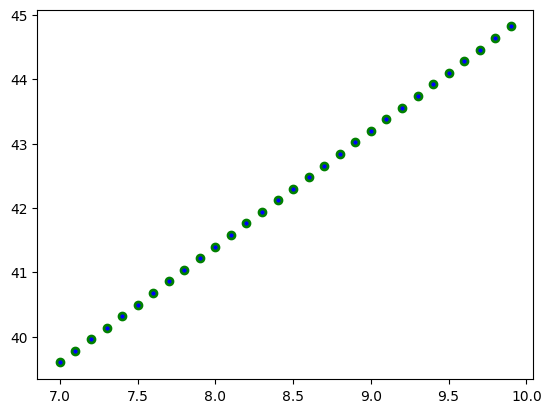

In [9]:
plt.scatter(X_test.to("cpu"),Y_test.to("cpu"),c="g")
plt.scatter(X_test.to("cpu"),Y_pred1.to("cpu"),c="b",s=4)
plt.show()

In [10]:
# save model
save_path = "model1.pt"
torch.save(model1.state_dict(),save_path)

In [11]:
# # Load model
# model2 = LinearRegressionModelNew(in_features,out_features)
# model2.load_state_dict(torch.load(save_path))